In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from IPython.display import HTML


In [43]:
df=pd.read_csv('Latest_Data_Science_Salaries (1).csv')
df

Job Title Employment Type Experience Level  \
0                Data Engineer       Full-Time           Senior   
1                Data Engineer       Full-Time           Senior   
2                Data Engineer       Full-Time           Senior   
3                Data Engineer       Full-Time           Senior   
4               Data Scientist       Full-Time           Senior   
...                        ...             ...              ...   
3295            Data Scientist       Full-Time           Senior   
3296  Principal Data Scientist       Full-Time              Mid   
3297            Data Scientist       Full-Time            Entry   
3298     Business Data Analyst        Contract            Entry   
3299      Data Science Manager       Full-Time           Senior   

     Expertise Level   Salary       Salary Currency Company Location  \
0             Expert   210000  United States Dollar    United States   
1             Expert   165000  United States Dollar    United States   
2             Expert   185900  United States Dollar    United States   
3             Expert   129300  United States Dollar    United States   
4             Expert   140000  United States Dollar    United States   
...              ...      ...                   ...              ...   
3295          Expert   412000  United States Dollar    United States   
3296    Intermediate   151000  United States Dollar    United States   
3297          Junior   105000  United States Dollar    United States   
3298          Junior   100000  United States Dollar    United States   
3299          Expert  7000000          Indian Rupee            India   

      Salary in USD Employee Residence Company Size  Year  
0            210000      United States       Medium  2023  
1            165000      United States       Medium  2023  
2            185900      United States       Medium  2023  
3            129300      United States       Medium  2023  
4            140000      United States       Medium  2023  
...             ...                ...          ...   ...  
3295         412000      United States        Large  2020  
3296         151000      United States        Large  2021  
3297         105000      United States        Small  2020  
3298         100000      United States        Large  2020  
3299          94665              India        Large  2021  

[3300 rows x 11 columns]

In [44]:
df.head()

Job Title Employment Type Experience Level Expertise Level  Salary  \
0   Data Engineer       Full-Time           Senior          Expert  210000   
1   Data Engineer       Full-Time           Senior          Expert  165000   
2   Data Engineer       Full-Time           Senior          Expert  185900   
3   Data Engineer       Full-Time           Senior          Expert  129300   
4  Data Scientist       Full-Time           Senior          Expert  140000   

        Salary Currency Company Location  Salary in USD Employee Residence  \
0  United States Dollar    United States         210000      United States   
1  United States Dollar    United States         165000      United States   
2  United States Dollar    United States         185900      United States   
3  United States Dollar    United States         129300      United States   
4  United States Dollar    United States         140000      United States   

  Company Size  Year  
0       Medium  2023  
1       Medium  2023  
2       Medium  2023  
3       Medium  2023  
4       Medium  2023

In [45]:
styles = [
            {'selector': 'th', 'props': [('border', '1px solid black'),('background-color', 'lightblue'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('border', '1px solid black'),('background-color', 'lightyellow'), ('text-align', 'center')]},

        ]

df.describe().T.style.bar(subset=['mean'], color='green') \
                               .set_table_styles(styles)
                             

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


In [50]:
# df.loc[1,'Salary'] = 0
# df.loc[156,'Company Location'] = np.NaN
df_zero_count = df.isin({0}).sum().sort_values(ascending=False)
df_zero_count_vertical = df_zero_count.to_frame()
df_zero_count_vertical['null'] = df.isnull().sum()
df_zero_count_vertical['unique'] = df.nunique()
df_zero_count_vertical

0  null  unique
Job Title           0     0     111
Employment Type     0     0       4
Experience Level    0     0       4
Expertise Level     0     0       4
Salary              0     0    1071
Salary Currency     0     0      22
Company Location    0     0      71
Salary in USD       0     0    1315
Employee Residence  0     0      83
Company Size        0     0       3
Year                0     0       4

In [51]:
border_styles = [
    {'selector': 'th, td', 'props': [('border', '1px solid black'), ('text-align', 'center')]},
]

# Apply border styles to the DataFrame
styled_df = df_zero_count_vertical.style.set_table_styles(border_styles)

# Display the styled DataFrame
display(styled_df)

In [55]:
df['Employment Type'].value_counts()

Full-Time    3261
Contract       15
Part-Time      13
Freelance      11
Name: Employment Type, dtype: int64

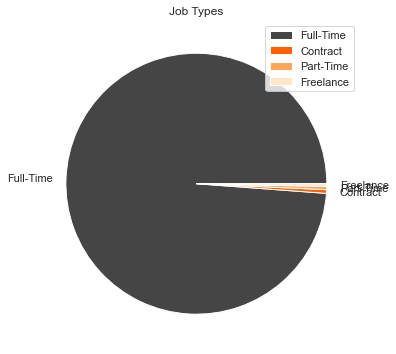

In [60]:
# Explorimg the data with python visualization

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the job types and their corresponding values
data = {
    'Job Type': ['Full-Time', 'Contract', 'Part-Time', 'Freelance'],
    'Count': [3261, 15, 13, 11]
}
j_type_data = pd.DataFrame(data)
colors = ['#454545', '#FF6000', '#FFA559', '#FFE6C7']

# Plot the pie chart using seaborn
plt.figure(figsize=(6, 6))  # Set the size of the chart
sns.set(style='whitegrid')  # Set the style of the chart

# Plot the pie chart
plt.pie(j_type_data['Count'], labels=j_type_data['Job Type'],colors=colors)

# Add a title to the chart
plt.title('Job Types')
plt.legend()

# Display the chart
plt.show()

In [61]:
df['Experience Level'].value_counts()

Senior       2065
Mid           797
Entry         292
Executive     146
Name: Experience Level, dtype: int64

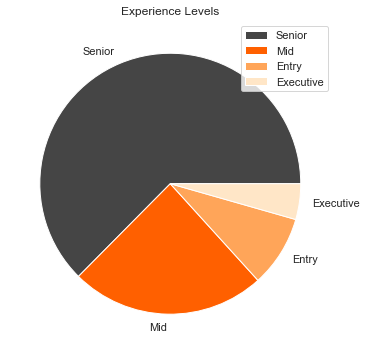

In [62]:
data = {
    'Experience Level': ['Senior', 'Mid', 'Entry', 'Executive'],
    'Count': [2065, 797, 292, 146]
}
df_experience_level = pd.DataFrame(data)

# Specify custom colors
colors = ['#454545', '#FF6000', '#FFA559', '#FFE6C7']

# Plot the pie chart using seaborn
plt.figure(figsize=(6, 6))  # Set the size of the chart
sns.set(style='whitegrid')  # Set the style of the chart

# Plot the pie chart with custom colors
wedges, texts = plt.pie(df_experience_level['Count'], labels=df_experience_level['Experience Level'], colors=colors)

# Add a title to the chart
plt.title('Experience Levels')
plt.legend()

# Display the chart
plt.show()

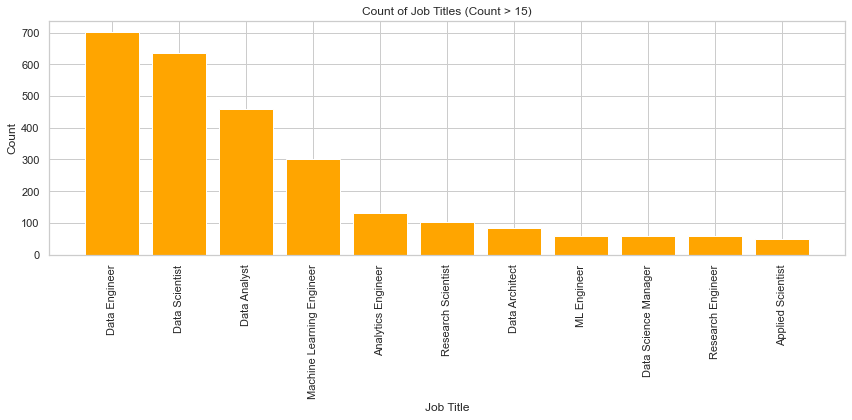

In [65]:
job_title_counts = df['Job Title'].value_counts()

# Filter job titles where counts are greater than 20
filtered_job_title_counts = job_title_counts[job_title_counts > 40]

# Plot the bar graph
plt.figure(figsize=(12, 6))  # Set the size of the chart
plt.bar(filtered_job_title_counts.index, filtered_job_title_counts.values, color='orange')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title to the chart
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Count of Job Titles (Count > 15)')

# Display the chart
plt.tight_layout()
plt.show()

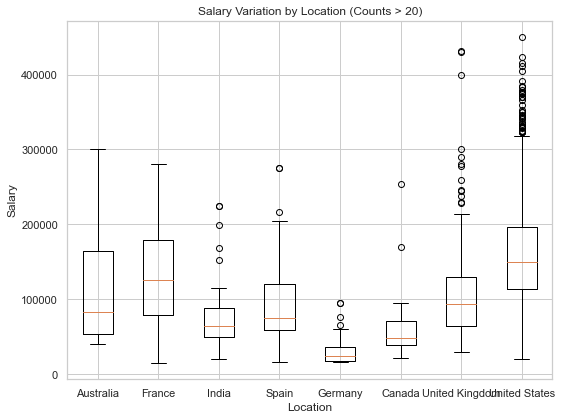

In [103]:
countries_count = df['Company Location'].value_counts()
filtered_locations = countries_count[countries_count > 20].index
filtered_df = df[df['Company Location'].isin(filtered_locations)]
plt.figure(figsize=(8, 6))  # Set the size of the chart
plt.boxplot(filtered_df.groupby('Company Location')['Salary in USD'].apply(list), labels=list(reversed(list(filtered_locations))))

# Add labels and title to the chart
plt.xlabel('Location')
plt.ylabel('Salary')
plt.title('Salary Variation by Location (Counts > 20)')

# Display the chart
plt.tight_layout()
plt.show()

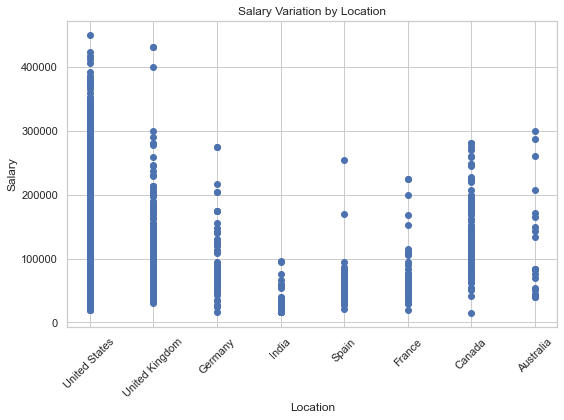

In [76]:
countries_count = df['Company Location'].value_counts()
filtered_locations = countries_count[countries_count > 20].index
filtered_df = df[df['Company Location'].isin(filtered_locations)]
plt.figure(figsize=(8, 6))  # Set the size of the chart

plt.scatter(filtered_df['Company Location'], filtered_df['Salary in USD'])

# Add labels and title to the chart
plt.xlabel('Location')
plt.ylabel('Salary')
plt.title('Salary Variation by Location')

# Display the chart
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [ ]:
# We generate some hypotheses [some prediction before analysis] for the data and verify their accuracy through exploratory data analysis (EDA).

# 1. 